# 스마트팜 데이터 시각화
수집한 스마트팜 토마토 빅데이터를 파악하기 위해 EDA를 진행한다.

In [1]:
import os
import pandas as pd
import numpy as np
import folium

tomato_code = '080300'
serviceKey = '923f389b2ca44295a07f14d1828aee0e'

In [3]:
file_list=os.listdir(r'C:\Users\youjeongsue\Desktop\study\4-2\스마트팜(소융캡&창종설)\data\cropping')
len(file_list)

59

In [12]:
identity_df = pd.read_csv('data/identity.csv', index_col=0)
identity_df.head()

,userId,facilityId,addressName,itemCode
0,PFS_0000001,PFS_0000001_01,경상남도 사천시,80300
1,PFS_0000002,PFS_0000002_01,전라북도 김제시,80300
2,PFS_0000003,PFS_0000003_01,경상남도 함안군,80300
3,PFS_0000004,PFS_0000004_01,경상남도 진주시,80300
4,PFS_0000006,PFS_0000006_01,전라북도 순창군,80300


In [13]:
len(identity_df)

105

In [20]:
cropping_df = pd.read_csv('data/cropping_user.csv', index_col=0)
cropping_df.head()

,index,userId,statusCode,statusMessage,croppingSerlNo,croppingSeasonName,croppingDate,croppingEndDate,croppingSystem,itemCode,...,stemSlabNum,planSlabNum,plantDensity,standardPlantDensity,floodlightDec,leafArea,stndTemp,stndWeight,stndSolar,stndMeta
0,0,PFS_0000001,0,NORMAL_CODE,79,데프니스_20150902,2015-09-02 00:00:00,2016-12-31 00:00:00,B0004000000000000002,80300,...,4.0,4.0,2.44,2.5,0.80,0.0,20.0,180.0,150.0,130.0
1,1,PFS_0000002,0,NORMAL_CODE,80,다볼_20150714,2015-07-14 00:00:00,2016-12-31 00:00:00,B0004000000000000002,80300,...,4.0,4.0,2.37,2.5,0.70,0.0,20.0,180.0,150.0,150.0
2,2,PFS_0000003,0,NORMAL_CODE,81,데프니스_20150902,2015-09-02 00:00:00,2016-12-31 00:00:00,B0004000000000000002,80300,...,2.0,4.0,2.40,2.5,0.70,0.0,18.0,180.0,100.0,130.0
3,3,PFS_0000004,0,NORMAL_CODE,82,데프니스_20150720,2015-07-20 00:00:00,2016-06-30 00:00:00,B0004000000000000002,80300,...,5.0,5.0,2.36,2.5,0.65,0.0,18.0,180.0,100.0,130.0
4,4,PFS_0000006,0,NORMAL_CODE,69,다볼_20150625,2015-06-25 00:00:00,2016-12-31 00:00:00,B0004000000000000002,80300,...,2.0,2.0,2.23,6.8,0.70,0.0,20.0,180.0,150.0,150.0


In [21]:
cultivate_df = pd.read_csv('data/all_cultivate_df.csv', index_col=0)
cultivate_df.head()

,statusCode,statusMessage,measDate,userId,itemCode,sampleNum,growLength,flowerTop,stemDiameter,leavesLength,leavesWidth,leavesNum,flowerPosition,fruitsPosition,fruitsNum,harvestPosition,ped,solarCorrection,fruitsWeight
0,0.0,NORMAL_CODE,2016-03-13 00:00:00,PFS_0000001,80300.0,2.0,20.0,19.0,12.0,46.0,42.0,22.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0
1,NaN,NaN,2016-03-13 00:00:00,PFS_0000001,80300.0,3.0,20.0,19.0,12.0,46.0,42.0,22.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0
2,NaN,NaN,2016-03-06 00:00:00,PFS_0000001,80300.0,3.0,20.0,20.0,12.0,46.0,41.0,20.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0
3,NaN,NaN,2016-03-06 00:00:00,PFS_0000001,80300.0,4.0,20.0,20.0,12.0,46.0,41.0,20.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0
4,NaN,NaN,2016-02-14 00:00:00,PFS_0000001,80300.0,1.0,18.0,20.0,12.0,47.0,41.0,18.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0


# 우수농가 데이터

In [31]:
grwdatarqst = pd.read_csv('data/grwdatarqst.csv', index_col=0)
grwdatarqst

,id,frtstGrupp,lefstalklt,frtstSetCo,pllnLt,flanGrupp,frtstCo,flanJnt,tcdmt,frmhsFclu,...,fcluHg,frmhsId,lefLt,flwrCo,hvstCo,frmWeek,lefCunt,frtstJnt,lefBt,stemThck
0,81,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81,0.000,0.0,0.00,31,0.00,0.0,0.000,0.0000
1,81,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81,0.000,0.0,0.00,32,0.00,0.0,0.000,0.0000
2,81,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81,0.000,0.0,0.00,33,0.00,0.0,0.000,0.0000
3,81,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81,0.000,0.0,0.00,34,0.00,0.0,0.000,0.0000
4,81,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81,0.000,0.0,0.00,35,0.00,0.0,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,349,18.50,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,...,0.0,349,53.025,0.0,5.25,22,10.75,0.0,56.950,8.9150
32,349,18.75,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,349,53.925,0.0,3.00,23,5.75,0.0,59.850,8.3975
33,349,18.50,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,349,52.375,0.0,5.00,24,5.75,0.0,60.875,9.0125
34,349,19.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,349,53.325,0.0,4.00,25,5.75,0.0,61.650,8.6550


In [32]:
envdatarqst = pd.read_csv('data/envdatarqst.csv', index_col=0)
envdatarqst

,id,inTp,inHd,measDtStr,otmsuplyqy,acSlrdQy,frmhsId,cunt,ph,outTp,outWs,daysuplyqy,inCo2,ec
0,81,24.933333,99.990000,20170815000000,0.0,0.0,81,0.0,0.0,22.411667,0.150000,0.0,408.750000,0.0
1,81,24.546667,99.980000,20170815010000,0.0,0.0,81,0.0,0.0,22.260000,0.021667,0.0,396.000000,0.0
2,81,23.873333,99.950000,20170815020000,0.0,0.0,81,0.0,0.0,22.280000,0.043333,0.0,379.266667,0.0
3,81,27.138333,100.000000,20170814170000,0.0,0.0,81,0.0,0.0,24.446667,0.038333,0.0,383.033333,0.0
4,81,26.143333,100.000000,20170814180000,0.0,0.0,81,0.0,0.0,23.961667,0.028333,0.0,383.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6865,349,25.925000,86.425000,20190625080000,0.0,0.0,349,0.0,0.0,24.415000,0.000000,0.0,479.716667,0.0
6866,349,29.045763,78.144068,20190625090000,0.0,0.0,349,0.0,0.0,26.274576,0.000000,0.0,465.423729,0.0
6867,349,31.374576,68.991525,20190625100000,0.0,0.0,349,0.0,0.0,28.211864,0.000000,0.0,455.118644,0.0
6868,349,33.423729,59.161017,20190625110000,0.0,0.0,349,0.0,0.0,30.422034,0.000000,0.0,448.677966,0.0


In [26]:
prddatarqst = pd.read_csv('data/prddatarqst.csv', index_col=0)
prddatarqst

,id,frmYear,frmMonth,frmAr,frmhsId,outtrn,frmWeek
0,81,2017,8,2700.0,81,0.0,31
1,81,2017,8,2700.0,81,0.0,32
2,81,2017,8,2700.0,81,0.0,33
3,81,2017,8,2700.0,81,0.0,34
4,81,2017,8,2700.0,81,0.0,35
...,...,...,...,...,...,...,...
31,349,2019,5,2800.0,349,14579.0,22
32,349,2019,6,2800.0,349,5566.0,23
33,349,2019,6,2800.0,349,10546.0,24
34,349,2019,6,2800.0,349,2507.0,25


In [27]:
target_farm = list(prddatarqst['outtrn'].groupby(prddatarqst['id']).max().index)
print(target_farm)

[9, 21, 25, 27, 28, 29, 31, 32, 39, 42, 44, 45, 48, 50, 51, 53, 54, 56, 57, 59, 81, 201, 202, 204, 205, 206, 207, 209, 210, 315, 316, 318, 319, 320, 324, 325, 326, 327, 332, 339, 344, 345, 349]


In [28]:
len(target_farm)

43

In [29]:
prd_mean = prddatarqst['outtrn'].groupby(prddatarqst['id']).mean()
prd_mean

id
9      5564.826087
21     2016.800000
25     4762.523810
27     2183.955556
28     7105.705882
29     2186.222222
31     2367.346939
32     2219.019231
39     2557.282609
42     2479.500000
44     1820.184211
45     2490.609756
48     3255.950937
50     2007.738095
51     2241.521739
53     2155.021739
54     2138.048780
56     4355.918919
57     3181.871795
59     1753.032609
81     4875.760000
201       0.000000
202       0.000000
204       0.000000
205       0.000000
206       0.000000
207       0.000000
209       0.000000
210       0.000000
315    2297.513514
316    4310.458333
318    1907.166667
319    2303.425000
320    1888.888889
324    2191.071429
325    2347.860465
326    6316.408163
327    2831.223501
332    1012.114286
339    2063.829787
344    1858.238916
345    2656.346939
349    5846.638889
Name: outtrn, dtype: float64

In [33]:
envdatarqst[envdatarqst['id'].isin(target_farm)]

,id,inTp,inHd,measDtStr,otmsuplyqy,acSlrdQy,frmhsId,cunt,ph,outTp,outWs,daysuplyqy,inCo2,ec
0,81,24.933333,99.990000,20170815000000,0.0,0.0,81,0.0,0.0,22.411667,0.150000,0.0,408.750000,0.0
1,81,24.546667,99.980000,20170815010000,0.0,0.0,81,0.0,0.0,22.260000,0.021667,0.0,396.000000,0.0
2,81,23.873333,99.950000,20170815020000,0.0,0.0,81,0.0,0.0,22.280000,0.043333,0.0,379.266667,0.0
3,81,27.138333,100.000000,20170814170000,0.0,0.0,81,0.0,0.0,24.446667,0.038333,0.0,383.033333,0.0
4,81,26.143333,100.000000,20170814180000,0.0,0.0,81,0.0,0.0,23.961667,0.028333,0.0,383.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6865,349,25.925000,86.425000,20190625080000,0.0,0.0,349,0.0,0.0,24.415000,0.000000,0.0,479.716667,0.0
6866,349,29.045763,78.144068,20190625090000,0.0,0.0,349,0.0,0.0,26.274576,0.000000,0.0,465.423729,0.0
6867,349,31.374576,68.991525,20190625100000,0.0,0.0,349,0.0,0.0,28.211864,0.000000,0.0,455.118644,0.0
6868,349,33.423729,59.161017,20190625110000,0.0,0.0,349,0.0,0.0,30.422034,0.000000,0.0,448.677966,0.0


In [34]:
env_mean = envdatarqst.groupby('id').mean()
env_mean

,inTp,inHd,measDtStr,otmsuplyqy,acSlrdQy,frmhsId,cunt,ph,outTp,outWs,daysuplyqy,inCo2,ec
id,,,,,,,,,,,,,
9,19.692461,82.866122,2.017615e+13,4.607077,59.591419,9.0,1.051022,0.226012,11.856522,0.523298,0.0,368.773857,0.093294
21,18.714666,82.791639,2.017690e+13,2.548854,47.183395,21.0,0.596148,0.184918,7.448242,1.271375,0.0,491.940720,0.096843
25,20.024558,79.426169,2.017578e+13,1.556083,51.572754,25.0,0.433253,0.145761,11.104874,1.169448,0.0,450.685584,0.068669
27,19.824651,81.662377,2.017608e+13,2.833745,0.000000,27.0,0.471309,0.197087,11.996821,0.030021,0.0,430.021804,0.094309
28,20.041040,83.434788,2.017644e+13,0.897398,0.000000,28.0,0.065315,0.029220,12.707568,0.000000,0.0,440.098868,0.011946
29,18.968454,80.117475,2.017628e+13,2.974128,53.747122,29.0,0.564624,0.220710,10.539773,0.963017,0.0,445.583986,0.104112
31,20.085510,87.776817,2.017650e+13,1.844642,54.523093,31.0,0.304773,0.140064,12.783530,0.855834,0.0,429.210649,0.061338
32,20.519512,85.471214,2.017566e+13,0.893277,61.162024,32.0,0.256786,0.098118,11.651226,0.000000,0.0,438.326190,0.044482
39,19.396359,85.732440,2.017619e+13,4.584184,59.051250,39.0,0.536420,0.277160,11.410407,1.189626,0.0,0.000000,0.131719


In [35]:
for i in target_farm:
    env_mean.loc[i,'outtrn_mean']=prd_mean[i]

In [36]:
env_mean_not_zero = env_mean[env_mean['outtrn_mean']!=0]
env_mean_not_zero

,inTp,inHd,measDtStr,otmsuplyqy,acSlrdQy,frmhsId,cunt,ph,outTp,outWs,daysuplyqy,inCo2,ec,outtrn_mean
id,,,,,,,,,,,,,,
9,19.692461,82.866122,2.017615e+13,4.607077,59.591419,9.0,1.051022,0.226012,11.856522,0.523298,0.0,368.773857,0.093294,5564.826087
21,18.714666,82.791639,2.017690e+13,2.548854,47.183395,21.0,0.596148,0.184918,7.448242,1.271375,0.0,491.940720,0.096843,2016.800000
25,20.024558,79.426169,2.017578e+13,1.556083,51.572754,25.0,0.433253,0.145761,11.104874,1.169448,0.0,450.685584,0.068669,4762.523810
27,19.824651,81.662377,2.017608e+13,2.833745,0.000000,27.0,0.471309,0.197087,11.996821,0.030021,0.0,430.021804,0.094309,2183.955556
28,20.041040,83.434788,2.017644e+13,0.897398,0.000000,28.0,0.065315,0.029220,12.707568,0.000000,0.0,440.098868,0.011946,7105.705882
29,18.968454,80.117475,2.017628e+13,2.974128,53.747122,29.0,0.564624,0.220710,10.539773,0.963017,0.0,445.583986,0.104112,2186.222222
31,20.085510,87.776817,2.017650e+13,1.844642,54.523093,31.0,0.304773,0.140064,12.783530,0.855834,0.0,429.210649,0.061338,2367.346939
32,20.519512,85.471214,2.017566e+13,0.893277,61.162024,32.0,0.256786,0.098118,11.651226,0.000000,0.0,438.326190,0.044482,2219.019231
39,19.396359,85.732440,2.017619e+13,4.584184,59.051250,39.0,0.536420,0.277160,11.410407,1.189626,0.0,0.000000,0.131719,2557.282609


In [37]:
del env_mean_not_zero['measDtStr']

In [38]:
del env_mean_not_zero['frmhsId']

In [39]:
env_mean_not_zero.head()

,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,daysuplyqy,inCo2,ec,outtrn_mean
id,,,,,,,,,,,,
9,19.692461,82.866122,4.607077,59.591419,1.051022,0.226012,11.856522,0.523298,0.0,368.773857,0.093294,5564.826087
21,18.714666,82.791639,2.548854,47.183395,0.596148,0.184918,7.448242,1.271375,0.0,491.940720,0.096843,2016.800000
25,20.024558,79.426169,1.556083,51.572754,0.433253,0.145761,11.104874,1.169448,0.0,450.685584,0.068669,4762.523810
27,19.824651,81.662377,2.833745,0.000000,0.471309,0.197087,11.996821,0.030021,0.0,430.021804,0.094309,2183.955556
28,20.041040,83.434788,0.897398,0.000000,0.065315,0.029220,12.707568,0.000000,0.0,440.098868,0.011946,7105.705882


In [40]:
env_mean_not_zero.iloc[:,-1]

id
9      5564.826087
21     2016.800000
25     4762.523810
27     2183.955556
28     7105.705882
29     2186.222222
31     2367.346939
32     2219.019231
39     2557.282609
42     2479.500000
44     1820.184211
45     2490.609756
48     3255.950937
50     2007.738095
51     2241.521739
53     2155.021739
54     2138.048780
56     4355.918919
57     3181.871795
59     1753.032609
81     4875.760000
315    2297.513514
316    4310.458333
318    1907.166667
319    2303.425000
320    1888.888889
324    2191.071429
325    2347.860465
326    6316.408163
327    2831.223501
332    1012.114286
339    2063.829787
344    1858.238916
345    2656.346939
349    5846.638889
Name: outtrn_mean, dtype: float64

## Decision Tree Regressor

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from utils import getCode
import numpy as np

In [6]:
pf0010066 = pd.read_csv('data/seasonenv/PF_0010066.csv', index_col=0)
pf0010066.drop_duplicates(ignore_index=True, inplace=True)
pf0010066.head()

,fatrCode,facilityId,measDate,fldCode,sectCode,itemCode,senVal,ymd,cntCollect,num,totalRows,totalPage,currentPage
0,EI,PF_0010066_01,2019-11-15 08:00:00,FG,NT,80300,2.80,20191115,16,1,101550.0,102.0,1.0
1,CI,PF_0010066_01,2019-11-15 08:00:00,FG,EI,80300,666.50,20191115,16,2,NaN,NaN,NaN
2,HI,PF_0010066_01,2019-11-15 08:00:00,FG,EI,80300,93.29,20191115,16,3,NaN,NaN,NaN
3,HE,PF_0010066_01,2019-11-15 08:00:00,FG,EO,80300,82.56,20191115,16,4,NaN,NaN,NaN
4,EO,PF_0010066_01,2019-11-15 08:00:00,FG,NT,80300,0.00,20191115,16,5,NaN,NaN,NaN


c:\users\youjeongsue\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


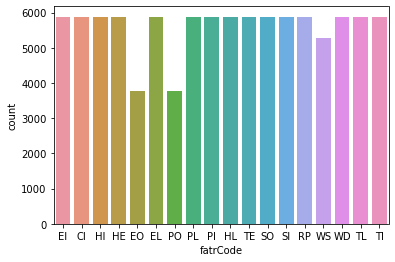

In [9]:
sns.countplot(pf0010066['fatrCode']);

In [15]:
for code in list(set(pf0010066['fatrCode'])):
    print(getCode(code))

(양액)총배액
(양액)배액EC
외부습도
토양PH
(양액)공급EC
외부온도
토양EC
(양액)총급액
지온
(양액)배액PH
내부온도
(양액)공급PH
내부습도
외부풍향
외부풍속
내부CO2
강우감지
지습


In [25]:
pf0010066.groupby('fatrCode')['senVal']

In [41]:
X = env_mean_not_zero.iloc[:,:-1]
y = env_mean_not_zero.iloc[:,-1]

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
env_mean_not_zero = env_mean_not_zero.astype('float')

In [43]:
env_tree = tree.DecisionTreeRegressor()
env_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
len(X_train)

24

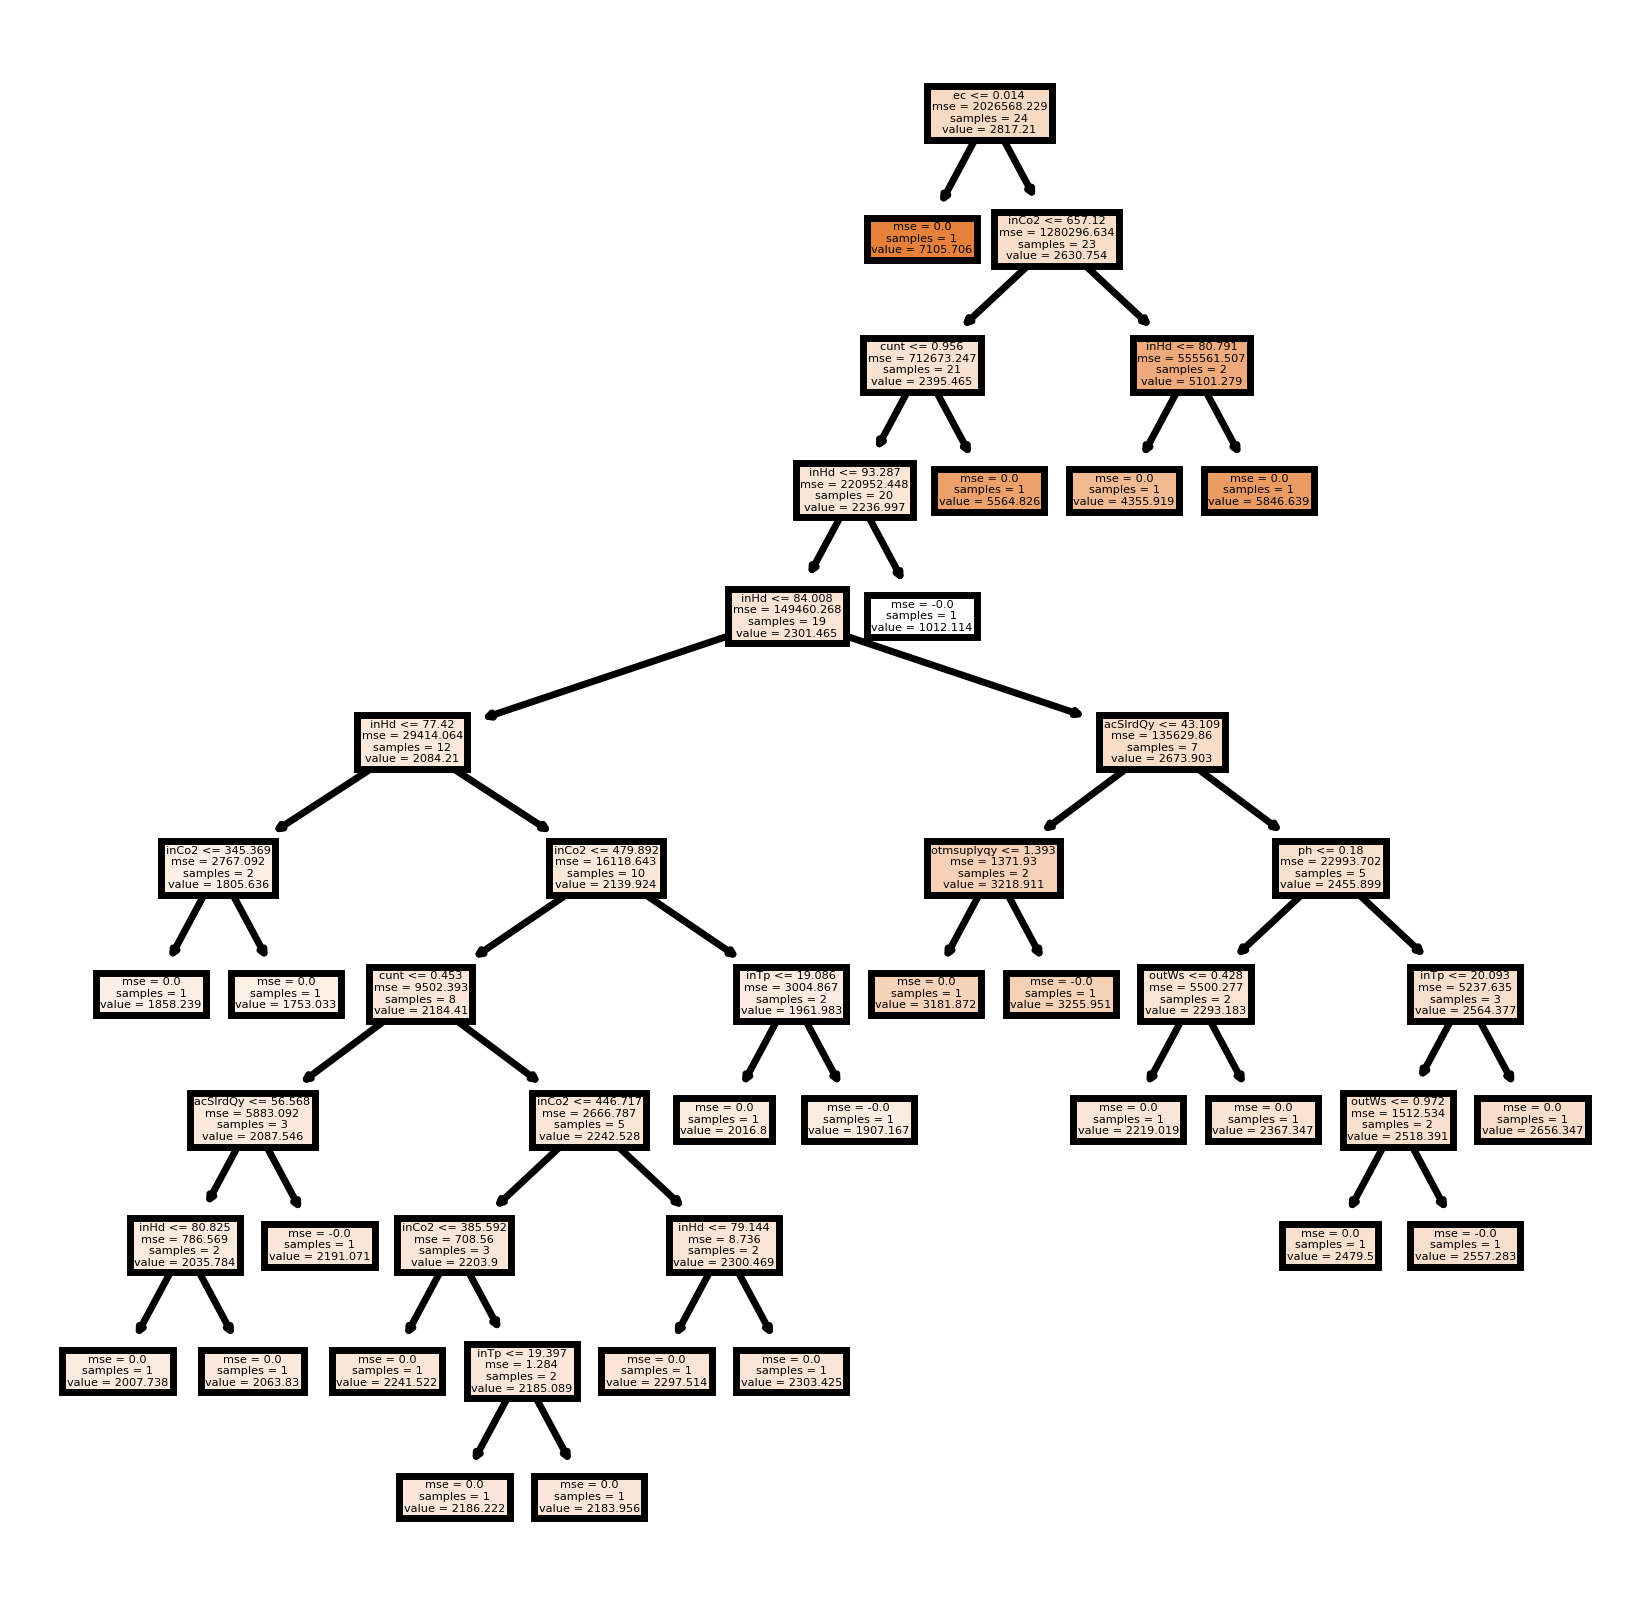

In [44]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(env_tree,
              feature_names = list(X.columns),
              class_names="outtrn_mean",
              filled=True)
fig.savefig('img/env_tree_v2.png')

## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

env_mlinear = LinearRegression()
env_mlinear.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_predict = env_mlinear.predict(X_test)
y_predict

array([3091.39540646, 4189.05622439, 2084.49548576, 2594.0910997 ,
       5502.3548626 , 2162.16756504,  279.3106293 , 2215.75002159,
       1402.84604445,  976.13756895, 2598.48101756])

In [49]:
env_variable = pd.DataFrame(columns=['variable', 'coef'])
env_variable['variable']=list(X_train.columns)
env_variable['coef']=env_mlinear.coef_
env_variable

,variable,coef
0,inTp,-3.863131e+02
1,inHd,4.302516e+01
2,otmsuplyqy,9.559359e+02
3,acSlrdQy,-1.508765e+01
4,cunt,1.411918e+03
5,ph,-2.380705e+04
6,outTp,2.813238e+02
7,outWs,-3.399187e+02
8,daysuplyqy,-3.637979e-12
9,inCo2,4.463911e+00


In [50]:
env_mean_not_zero

,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,daysuplyqy,inCo2,ec,outtrn_mean
id,,,,,,,,,,,,
9,19.692461,82.866122,4.607077,59.591419,1.051022,0.226012,11.856522,0.523298,0.0,368.773857,0.093294,5564.826087
21,18.714666,82.791639,2.548854,47.183395,0.596148,0.184918,7.448242,1.271375,0.0,491.940720,0.096843,2016.800000
25,20.024558,79.426169,1.556083,51.572754,0.433253,0.145761,11.104874,1.169448,0.0,450.685584,0.068669,4762.523810
27,19.824651,81.662377,2.833745,0.000000,0.471309,0.197087,11.996821,0.030021,0.0,430.021804,0.094309,2183.955556
28,20.041040,83.434788,0.897398,0.000000,0.065315,0.029220,12.707568,0.000000,0.0,440.098868,0.011946,7105.705882
29,18.968454,80.117475,2.974128,53.747122,0.564624,0.220710,10.539773,0.963017,0.0,445.583986,0.104112,2186.222222
31,20.085510,87.776817,1.844642,54.523093,0.304773,0.140064,12.783530,0.855834,0.0,429.210649,0.061338,2367.346939
32,20.519512,85.471214,0.893277,61.162024,0.256786,0.098118,11.651226,0.000000,0.0,438.326190,0.044482,2219.019231
39,19.396359,85.732440,4.584184,59.051250,0.536420,0.277160,11.410407,1.189626,0.0,0.000000,0.131719,2557.282609


In [57]:
env_mean_not_zero.to_csv("data/env_mean.csv")

In [51]:
#square of R
print(env_mlinear.score(X_train, y_train))

0.4546723863734966


## h2o

In [ ]:
import h2o

h2o.init()
h2o.demo("glm")

In [52]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(nthreads=-1, max_mem_size=8)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from c:\users\youjeongsue\appdata\local\programs\python\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\YOUJEO~1\AppData\Local\Temp\tmpv6vunz05
  JVM stdout: C:\Users\YOUJEO~1\AppData\Local\Temp\tmpv6vunz05\h2o_youjeongsue_started_from_python.out
  JVM stderr: C:\Users\YOUJEO~1\AppData\Local\Temp\tmpv6vunz05\h2o_youjeongsue_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,13 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,"28 days, 23 hours and 16 minutes"
H2O_cluster_name:,H2O_from_python_youjeongsue_m0u9bk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.111 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [53]:
#fake_env=env_mean_not_zero 여러번 반복한거
data = h2o.H2OFrame(fake_env)
data

Parse progress: |█████████████████████████████████████████████████████████| 100%


inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,daysuplyqy,inCo2,ec,outtrn_mean
19.6925,82.8661,4.60708,59.5914,1.05102,0.226012,11.8565,0.523298,0,368.774,0.0932944,5564.83
18.7147,82.7916,2.54885,47.1834,0.596148,0.184918,7.44824,1.27138,0,491.941,0.0968428,2016.8
20.0246,79.4262,1.55608,51.5728,0.433253,0.145761,11.1049,1.16945,0,450.686,0.0686692,4762.52
19.8247,81.6624,2.83375,0,0.471309,0.197087,11.9968,0.0300214,0,430.022,0.0943093,2183.96
20.041,83.4348,0.897398,0,0.0653153,0.0292196,12.7076,0,0,440.099,0.0119458,7105.71
18.9685,80.1175,2.97413,53.7471,0.564624,0.22071,10.5398,0.963017,0,445.584,0.104112,2186.22
20.0855,87.7768,1.84464,54.5231,0.304773,0.140064,12.7835,0.855834,0,429.211,0.0613385,2367.35
20.5195,85.4712,0.893277,61.162,0.256786,0.0981179,11.6512,0,0,438.326,0.0444821,2219.02
19.3964,85.7324,4.58418,59.0512,0.53642,0.27716,11.4104,1.18963,0,0,0.131719,2557.28
18.8032,86.6363,2.65289,50.1965,0.307811,0.227617,12.6264,0.754966,0,344.592,0.0897957,2479.5


In [54]:
splits = data.split_frame(ratios=[0.7,0.15], seed=1)
train=splits[0]
valid=splits[1]
test=splits[2]

print(train.nrow)
print(valid.nrow)
print(test.nrow)

28
5
2


In [83]:
y='outtrn_mean'
x=list(data.columns)

x.remove(y)

print(x)

['inTp', 'inHd', 'measDtStr', 'otmsuplyqy', 'acSlrdQy', 'frmhsId', 'cunt', 'ph', 'outTp', 'outWs', 'daysuplyqy', 'inCo2', 'ec']


In [85]:
aml = H2OAutoML(max_models=10, max_runtime_secs=1000, seed=1)

aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |█
13:53:05.947: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:53:05.949: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


In [86]:
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_1_AutoML_20201013_135305,8.42435e-07,0.000917843,8.42435e-07,0.000533191,8.46831e-07
GBM_grid__1_AutoML_20201013_135305_model_1,8.66171e-07,0.000930683,8.66171e-07,0.000518729,1.95762e-06
GBM_3_AutoML_20201013_135305,8.88124e-07,0.000942403,8.88124e-07,0.00060842,9.76525e-07
GBM_2_AutoML_20201013_135305,8.96191e-07,0.000946673,8.96191e-07,0.000548218,1.08187e-06
GBM_4_AutoML_20201013_135305,9.12766e-07,0.000955388,9.12766e-07,0.000566332,8.93294e-07
StackedEnsemble_AllModels_AutoML_20201013_135305,0.854039,0.924142,0.854039,0.691248,0.00764108
DRF_1_AutoML_20201013_135305,3.39797,1.84336,3.39797,0.543953,0.0125726
StackedEnsemble_BestOfFamily_AutoML_20201013_135305,4.07765,2.01932,4.07765,1.51392,0.0158293
XRT_1_AutoML_20201013_135305,5.11759,2.26221,5.11759,0.792027,0.0158291
DeepLearning_1_AutoML_20201013_135305,340.76,18.4597,340.76,12.9151,0.11854
